# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Problem Statement

To identify and classify images as cats or dogs

## Learning Objectives

At the end of the experiment, you will be able to :

* Load and prepare images for model using Pytorch
* Develop a CNN model and improve model performance

## Dataset

The Dogs vs. Cats dataset is a standard computer vision dataset that involves classifying photos as either containing a dog or cat. The train folder contains 22,500 images of dogs and cats. Each image in this folder has the label as part of the filename. The test folder contains 2,500 images, named according to a numeric id. For each image in the test set, you should predict a probability that the image is a dog or a cat (1 = dog, 0 = cat).

## Grading = 30 Marks

## Setup Steps

In [ ]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()

notebook="Exact_Note_Book_Name" #name of the notebook
Answer = "This notebook is graded by mentors on the day of hackathon"
def setup():
#
   ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/Cat_Dog_data.zip")

# ipython.magic("sx mv AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.bin?dl=1 AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.bin")
   print ("Setup completed successfully")
   return

setup()

Setup completed successfully


In [ ]:
!unzip -qq Cat_Dog_data.zip

In [ ]:
ls

Cat_Dog_data/  Cat_Dog_data.zip  __MACOSX/  sample_data/


## Basic Pytorch packages

**torchvision :**  This package is used to load and prepare the dataset. Using this package we can perform/apply transformations on the input data.

**transforms :**  This package is  used to perform preprocessing on images and operations sequentially.

**nn :**  This package provides an easy and modular way to build and train simple or complex neural networks.

**optim:** This package is used for  implementing various optimization algorithms

In [ ]:
# Import Libraries
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.autograd import Variable

In [ ]:
!pip install ipython-autotime
%load_ext autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=266afe5c88a37744df19b65dd5b761de8054c971b3fe4279e2f04eacf3da135a
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


## **Stage 1:** Define Transformations and import data

### 3 Marks - > Compose multiple transformations with the following conditions

1. Transform image size to 128 by using Resize()

2. Convert image to Grayscale

3. Transform image into a number using tensor

4. Normalize the tensor image with 0.5

[Hint](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html)

In [ ]:
### To test whether GPU instance is present in the system of not.
use_cuda = torch.cuda.is_available()
print('Using PyTorch version:', torch.__version__, 'CUDA:', use_cuda)

Using PyTorch version: 1.4.0 CUDA: True


In [ ]:
device = torch.device("cuda" if use_cuda else "cpu")
device

device(type='cuda')

In [ ]:
image_size = (128,128)

transformations = transforms.Compose(
        [transforms.Resize(list(image_size)),
            transforms.Grayscale(num_output_channels=1), transforms.ToTensor(),
         transforms.Normalize(mean=[0.5], std=[0.5])])

### 1 Mark -> Load the dataset with the defined transformations

PyTorch includes a package called torchvision which is used to load and prepare the dataset. It includes two basic functions namely Dataset and DataLoader which helps in transformation and loading of dataset.

1. Dataset is used to read and transform a datapoint from the given dataset.  Note that, the data is not loaded on memory by now.

2. DataLoader is used to shuffle and batch the data. It can be used to load the data in parallel with multiprocessing workers.The Data loader reads the data and puts it into memory.



[Hint](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html)

In [ ]:
batch_size = 100

train_set = datasets.ImageFolder('/content/Cat_Dog_data/train', transform = transformations)

# YOUR CODE HERE for the DataLoader
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=10)

In [ ]:
# Get input/output from data loader
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([100, 1, 128, 128]) type: torch.FloatTensor
y_train: torch.Size([100]) type: torch.LongTensor


### 3 Marks -> Plot the first 5 images of Cats and 5 images of Dogs

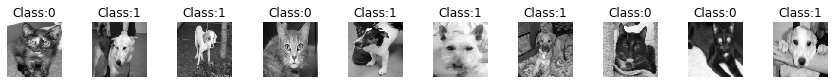

time: 387 ms


In [ ]:
# YOUR CODE HERE for plotting the images
pltsize=1
plt.figure(figsize=(15*pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(X_train[i,:,:,:].numpy().reshape(128,128), cmap="gray")
    plt.title('Class:'+str(y_train[i].numpy()))

## **Stage2:** CNN Model

Neural Networks are inherited from the nn.Module class.

Define a neural network by using two functions \__init__ and forward function.

1. In the \__init__  function, perform a series of convolutions and pooling operations to detect the features. Apply fully connected layer on top of these features. Apply LogSoftmax at the output layer to improve the performance.

2. The forward function is called on the Neural Network which takes the inputs and passes through the different layers that have been defined in the \__init__.  The output of both convolution and pooling layers are 3D whereas fully connected layer expects a 1D vector of numbers. So flatten the output of the final pooling layer to a vector and that becomes the input to the fully connected layer.

[Hint](https://medium.com/ml2vec/intro-to-pytorch-with-image-classification-on-a-fashion-clothes-dataset-e589682df0c5)



### 6 Marks -> Create CNN Model


In [ ]:
# class CNNModel(nn.Module):
#     def __init__(self):
#         super(CNNModel, self).__init__()

#         # Convolution Layer 1
#         self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=2) # output size of the first convolutional layer is 16*128*128
#         self.bn1 = nn.BatchNorm2d(16)
#         self.relu1 = nn.ReLU()
#         # Maxpool for the Convolutional Layer 1
#         self.maxpool1 = nn.MaxPool2d(kernel_size=4, stride=4) # Maxpooling reduces the size by kernel size. After Maxpooling the output size is 16*32*32


#         # YOUR CODE HERE for defining more number of Convolutional layers with Maxpool as required (Hint: Use atleast 3 convolutional layer for better performance)
#         self.cnn2 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=2) # output size of the first convolutional layer is 16*32*32
#         self.bn2 = nn.BatchNorm2d(16)
#         self.relu2 = nn.ReLU()
#         # Maxpool for the Convolutional Layer 2
#         self.maxpool2 = nn.MaxPool2d(kernel_size=1, stride=4) # Maxpooling reduces the size by kernel size. After Maxpooling the output size is 16*32*32


#         self.cnn3 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=2) # output size of the first convolutional layer is 16*32*32
#         self.bn3 = nn.BatchNorm2d(16)
#         self.relu3 = nn.ReLU()
#         # Maxpool for the Convolutional Layer 3
#         self.maxpool3 = nn.MaxPool2d(kernel_size=1, stride=4) # Maxpooling reduces the size by kernel size. After Maxpooling the output size is 16*32*32



#         # YOUR CODE HERE for defining the Fully Connected Layer and also define LogSoftmax
#         self.fc3 = nn.Linear(32, 2)




#     def forward(self, x):
#         # Convolution Layer 1 and Maxpool
#         out = self.cnn1(x)
#         out = self.bn1(out)
#         out = self.relu1(out)
#         out = self.maxpool1(out)

#         # YOUR CODE HERE for the Convolutional Layers and Maxpool based on the defined Convolutional layers




#         # YOUR CODE HERE for flattening the output of the final pooling layer to a vector. Flattening is simply arranging the 3D volume of numbers into a 1D vector
#         # out = flatten(out)




#         # YOUR CODE HERE for returning the output of LogSoftmax after applying Fully Connected Layer
#         return F.log_softmax(self.fc3(out), dim=1)





In [ ]:
class Flatten(torch.nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

time: 2.23 ms


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # Convolutional Layers
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer4 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=5, padding=2),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=5, padding=2),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2))

        # Dropout to avoid overfitting
        self.drop_out = nn.Dropout()

        # Fully connected layers
        self.fc1 = nn.Linear(4*4*128, 512)
        self.fc2 = nn.Linear(512, 2)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)

        # Flatten
        out = out.view(out.size(0), -1)

        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

time: 42.8 ms


### 2 Marks -> Declaring the loss function and optimizer


In [ ]:
model = CNN()
model = model.to(device)
print(model)

#criterion = # YOUR CODE HERE : Explore and declare loss function
# loss_fn = torch.nn.BCELoss()
loss_fn = torch.nn.CrossEntropyLoss()

#optimizer = # YOUR CODE HERE : Explore on optimizer and define with the learning rate
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
learning_rate = 0.001;
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate);


CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer4): Sequential(
    (0): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d

### 5 Marks -> Train the Model and validate it continuously to calculate the loss and accuracy for dataset across each epoch.

Iterate over images in the train_loader and perform the following steps.

1. First we zero out the gradients using zero_grad()

2. We pass the data to the model

3. We calculate the loss using Loss function

4. Perform Backward pass using backward() to update the weights

5. Optimize and predict by using the torch.max()

6. Calculate the accuracy of the train dataset

[Hint](https://medium.com/ml2vec/intro-to-pytorch-with-image-classification-on-a-fashion-clothes-dataset-e589682df0c5)

In [ ]:
# YOUR CODE HERE. This will take time

# Record loss and accuracy of the train dataset
def train(epoch, log_interval=100):
    for batch_idx, (data, target) in enumerate(train_loader):
        data = Variable(data.float())
        target = Variable(target)
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

        # Track the accuracy
        total = target.size(0)
        _, predicted = torch.max(output.data, 1)
        correct = (predicted == target).sum().item()

        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tAccuracy: {:.2f}%'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item(), (correct / total) * 100))


time: 16 ms


In [ ]:
%%time
epochs = 10
lossv, accv = [], []
for epoch in range(1, epochs+1):
    train(epoch)
    # test(lossv, accv)

Train Epoch: 1 [0/22500 (0%)]	Loss: 0.708070	Accuracy: 54.00%
Train Epoch: 1 [10000/22500 (44%)]	Loss: 0.704180	Accuracy: 59.00%
Train Epoch: 1 [20000/22500 (89%)]	Loss: 0.540300	Accuracy: 72.00%
Train Epoch: 2 [0/22500 (0%)]	Loss: 0.528551	Accuracy: 76.00%
Train Epoch: 2 [10000/22500 (44%)]	Loss: 0.382834	Accuracy: 82.00%
Train Epoch: 2 [20000/22500 (89%)]	Loss: 0.395349	Accuracy: 83.00%
Train Epoch: 3 [0/22500 (0%)]	Loss: 0.357758	Accuracy: 88.00%
Train Epoch: 3 [10000/22500 (44%)]	Loss: 0.281824	Accuracy: 87.00%
Train Epoch: 3 [20000/22500 (89%)]	Loss: 0.316429	Accuracy: 89.00%
Train Epoch: 4 [0/22500 (0%)]	Loss: 0.234762	Accuracy: 93.00%
Train Epoch: 4 [10000/22500 (44%)]	Loss: 0.333062	Accuracy: 86.00%
Train Epoch: 4 [20000/22500 (89%)]	Loss: 0.470234	Accuracy: 79.00%
Train Epoch: 5 [0/22500 (0%)]	Loss: 0.287127	Accuracy: 86.00%
Train Epoch: 5 [10000/22500 (44%)]	Loss: 0.207264	Accuracy: 89.00%
Train Epoch: 5 [20000/22500 (89%)]	Loss: 0.286171	Accuracy: 88.00%
Train Epoch: 6 [0/22

In [ ]:
# Save model
torch.save(model.state_dict(), 'conv_net_model.ckpt')

time: 32.2 ms


In [ ]:
# Load the model
loaded_model = CNN()
loaded_model.load_state_dict(torch.load('conv_net_model.ckpt'))
loaded_model.eval()

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer4): Sequential(
    (0): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d

time: 42.3 ms


## **Stage 3:** Testing Evaluation for CNN model

### Expected performance of test evaluation is above 90%

### 5 Marks -> Evaluate model with the given test data

1. Transform and load the test images.

2. Pass the test images through the model (network) to get the outputs

3. Get the predictions from maximum value using torch.max

4. Compare with the actual labels and get the count

5. Calculate the accuracy

[Hint](https://medium.com/ml2vec/intro-to-pytorch-with-image-classification-on-a-fashion-clothes-dataset-e589682df0c5)

In [ ]:
val_set = datasets.ImageFolder('/content/Cat_Dog_data/test',transform = transformations)

# YOUR CODE HERE for the DataLoader
test_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=10)

In [ ]:
# Get input/output from data loader
for (X_test, y_test) in test_loader:
    print('X_test:', X_test.size(), 'type:', X_test.type())
    print('y_test:', y_test.size(), 'type:', y_test.type())
    break

X_test: torch.Size([100, 1, 128, 128]) type: torch.FloatTensor
y_test: torch.Size([100]) type: torch.LongTensor


In [ ]:
# YOUR CODE HERE for calculating the accuracy
loaded_model.eval()
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.float())
    # images, labels = images.to(device), labels.to(device)
    outputs = loaded_model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('Test Accuracy of the model on test images: %.4f %%' % (100 * correct / total))

Test Accuracy of the model on test images: 86.0000 %
time: 34.8 s


In [ ]:
print(correct, total)

tensor(2173) 2500
time: 2.77 ms


## **Stage 4:** Classify the model using different Classifiers


In [ ]:
# # Loading the model for the entire dataset. This will take more time for loading.
train_Class = torch.utils.data.DataLoader(train_set)
test_loader1 = torch.utils.data.DataLoader(val_set)
x_train =[]
y_train=[]
x_test=[]
y_test=[]
for data,target in train_Class:
  x_train.append(data.numpy())
  y_train.append(target.numpy())
for data, target in test_loader1:
  x_test.append(data.numpy())
  y_test.append(target.numpy())

In [ ]:
import numpy as np
x_train=np.array(x_train)
x_test=np.array(x_test)

In [ ]:
x_train.shape
x_train = x_train.reshape(22500,128*128)
x_test = x_test.reshape(2500,128*128)

In [ ]:
x_test.shape

(2500, 1, 1, 128, 128)

time: 3.87 ms


In [ ]:
import pickle
pickle.dump(x_train, open('x_train.pkl', 'wb'))
pickle.dump(y_train, open('y_train.pkl', 'wb'))
pickle.dump(x_test, open('x_test.pkl', 'wb'))
pickle.dump(y_test, open('y_test.pkl', 'wb'))

time: 598 ms


### 5 Marks -> Use different algorithms (atleast 5 algorithms) for predicting the performance

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from skimage.io import imread, imshow
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import glob

In [ ]:
#function to calculate the accuracy
def accuracy(actual,predicted):
    return accuracy_score(actual,predicted, normalize=True)

In [ ]:
# Common method to train/test and print accuracies for both
def train_test(model):
  model.fit(x_train, y_train)
  y_train_predicted = model.predict(x_train)
  y_test_predicted = model.predict(x_test)
  print("Model:", model)
  print("Training accuracy : ", accuracy(y_train,y_train_predicted))
  print("Test accuracy : ", accuracy(y_test,y_test_predicted))

In [ ]:
# RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
train_test(rf_model)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
Training accuracy :  1.0
Test accuracy :  0.6448
time: 4min 11s


In [ ]:
#DT Classifier
dt_clf = DecisionTreeClassifier(max_depth=10)
train_test(dt_clf)

Model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Training accuracy :  0.7382666666666666
Test accuracy :  0.582


In [ ]:
# MLP Classifer
mlp_cf = MLPClassifier(activation='relu' ,solver='adam' ,hidden_layer_sizes=(5,),max_iter = 100 ,learning_rate = 'constant',learning_rate_init=0.01)
train_test(mlp_cf)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Model: MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5,), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
Training accuracy :  0.9117777777777778
Test accuracy :  0.5756


In [ ]:
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=10, max_samples=0.8,
                        random_state=1)
train_test(bag)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
svm_clf = SVC(kernel='linear', C=0.1)
train_test(svm_clf)